In [6]:
%%bash
# create phantom

output_dir="./phantoms"
mkdir -p "$output_dir"

phantom_file="$output_dir/phantom.h5"

spinwalk phantom -t -f 600 -z 10 -o "$phantom_file"
ls -l --block-size=M "$output_dir"


 ____            _          __        __          _   _        
/ ___|   _ __   (_)  _ __   \ \      / /   __ _  | | | | __    
\___ \  | '_ \  | | | '_ \   \ \ /\ / /   / _` | | | | |/ /    
 ___) | | |_) | | | | | | |   \ V  V /   | (_| | | | |   <     
|____/  | .__/  |_| |_| |_|    \_/\_/     \__,_| |_| |_|\_\    
        |_|                                                    


SpinWalk Version: 1.19.1
Log file location: "/DATA2/microvascular/cylinder/figure8_spin_density/log_spinwalk.txt"
Generating phantom with two pools...
Done.
total 1M
-rw-r--r-- 1 aaghaeifar kyb 1M Feb  9 22:38 phantom.h5


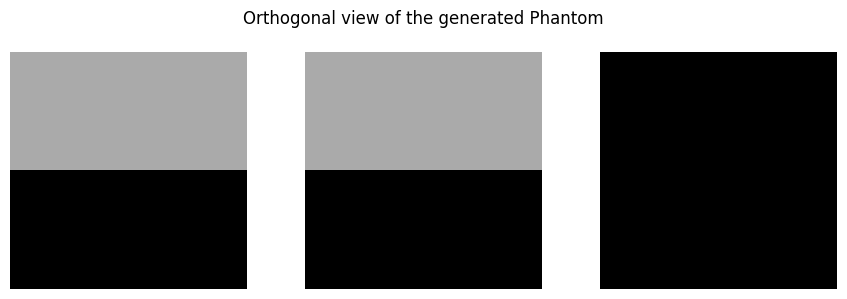

In [7]:
# plot the generated phantoms
import h5py
import matplotlib.pyplot as plt

def plot_phantom(file_path, title=None):
    with h5py.File(file_path, "r") as f:
        mask = f["mask"][()]
        sz = tuple(dim // 2 for dim in mask.shape)
        # print orthogonal views
        fig, axes = plt.subplots(1, 3, figsize=(9, 3))
        axes[0].imshow(mask[:, :, sz[2]], cmap="gray", vmin=-0, vmax=1.5)
        axes[0].axis("off")
        axes[1].imshow(mask[:, sz[1], :], cmap="gray", vmin=-0, vmax=1.5)
        axes[1].axis("off")
        axes[2].imshow(mask[sz[0], :, :], cmap="gray", vmin=-0, vmax=1.5)
        axes[2].axis("off")

        # title
        plt.suptitle(title)
        plt.tight_layout()
        plt.show()

# show the phantom
output_file="./phantoms/phantom.h5"
plot_phantom(output_file, title="Orthogonal view of the generated Phantom")

In [10]:
%%bash
# generate config files
config_dir="./configs"
phantom_file="../phantoms/phantom.h5"
spinwalk config -s GRE --TE 1000000 -t 50 -p "$phantom_file" -o "$config_dir/gre_permeable_samediffusivities.ini"
spinwalk config -s GRE --TE 1000000 -t 50 -p "$phantom_file" -o "$config_dir/gre_semipermeable_samediffusivities.ini"
spinwalk config -s GRE --TE 1000000 -t 50 -p "$phantom_file" -o "$config_dir/gre_permeable_differentdiffusivities.ini"

# replace the default config file with the scales.ini as the parent config
sed -i 's/RECORD_TRAJECTORY = 0/RECORD_TRAJECTORY = 1/g' "$config_dir/default_config.ini"
sed -i 's/NUMBER_OF_SPINS = 1e5/NUMBER_OF_SPINS = 5e4/g' "$config_dir/default_config.ini"
sed -i 's|OUTPUT_DIR = ./outputs|OUTPUT_DIR = ../outputs|' "$config_dir/default_config.ini"
sed -i 's/SEED = 0/SEED = 10/g' "$config_dir/default_config.ini"

sed -i 's/SEQ_NAME = gre/SEQ_NAME = gre_permeable_samediffusivities/g' "$config_dir/gre_permeable_samediffusivities.ini"
sed -i 's/SEQ_NAME = gre/SEQ_NAME = gre_semipermeable_samediffusivities/g' "$config_dir/gre_semipermeable_samediffusivities.ini"
sed -i 's/SEQ_NAME = gre/SEQ_NAME = gre_permeable_differentdiffusivities/g' "$config_dir/gre_permeable_differentdiffusivities.ini"

echo -e "\n\n[TISSUE_PARAMETERS]\nP_XY[0] = 1.0 1.0\nP_XY[1] = 1.0 1.0\n\nDIFFUSIVITY[0] = 1.0e-9\nDIFFUSIVITY[1] = 1.0e-9" >> "$config_dir/gre_permeable_samediffusivities.ini"
echo -e "\n\n[TISSUE_PARAMETERS]\nP_XY[0] = 1.0 0.1\nP_XY[1] = 0.0 1.0\n\nDIFFUSIVITY[0] = 1.0e-9\nDIFFUSIVITY[1] = 1.0e-9" >> "$config_dir/gre_semipermeable_samediffusivities.ini"
echo -e "\n\n[TISSUE_PARAMETERS]\nP_XY[0] = 1.0 1.0\nP_XY[1] = 1.0 1.0\n\nDIFFUSIVITY[0] = 2.0e-9\nDIFFUSIVITY[1] = 1.0e-9" >> "$config_dir/gre_permeable_differentdiffusivities.ini"

spinwalk sim -p -c "$config_dir/gre_permeable_samediffusivities.ini" "$config_dir/gre_semipermeable_samediffusivities.ini" "$config_dir/gre_permeable_differentdiffusivities.ini"

ls -l --block-size=M ./outputs/*.h5

 ____            _          __        __          _   _        
/ ___|   _ __   (_)  _ __   \ \      / /   __ _  | | | | __    
\___ \  | '_ \  | | | '_ \   \ \ /\ / /   / _` | | | | |/ /    
 ___) | | |_) | | | | | | |   \ V  V /   | (_| | | | |   <     
|____/  | .__/  |_| |_| |_|    \_/\_/     \__,_| |_| |_|\_\    
        |_|                                                    


SpinWalk Version: 1.19.1
Log file location: "/DATA2/microvascular/cylinder/figure8_spin_density/log_spinwalk.txt"
Configuration file is generated in /DATA2/microvascular/cylinder/figure8_spin_density/configs/gre_permeable_samediffusivities.ini
 ____            _          __        __          _   _        
/ ___|   _ __   (_)  _ __   \ \      / /   __ _  | | | | __    
\___ \  | '_ \  | | | '_ \   \ \ /\ / /   / _` | | | | |/ /    
 ___) | | |_) | | | | | | |   \ V  V /   | (_| | | | |   <     
|____/  | .__/  |_| |_| |_|    \_/\_/     \__,_| |_| |_|\_\    
        |_|                                       

In [12]:
# %matplotlib widget
import os
import numpy as np
import h5py
import matplotlib.pyplot as plt

plt.rcParams['svg.fonttype'] = 'none' # to embed fonts in SVG output

def read_XYZ(filename):
    with h5py.File(filename, 'r') as h5:
        XYZ = np.array(h5['XYZ'])                
    return XYZ

results_dir = './outputs/'

filename = list()
filename.append(os.path.join(results_dir, 'gre_permeable_samediffusivities_phantom.h5'))
filename.append(os.path.join(results_dir, 'gre_permeable_differentdiffusivities_phantom.h5'))
filename.append(os.path.join(results_dir, 'gre_semipermeable_samediffusivities_phantom.h5'))

# pick only X component of the position of spins
FoV_2   = 600e-6 / 2.0
P_count = list()
for f in filename:
    P = read_XYZ(f)[...,0].squeeze()
    P_count.append(np.sum(P > FoV_2, axis=0))

<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_124337/3979146696.py:32: SyntaxWarning: invalid escape sequence '\m'
  ax_t.set_ylabel('Particles Density in Substrate 1 (spin / $\mathrm{mm^3}$)', fontsize=16)


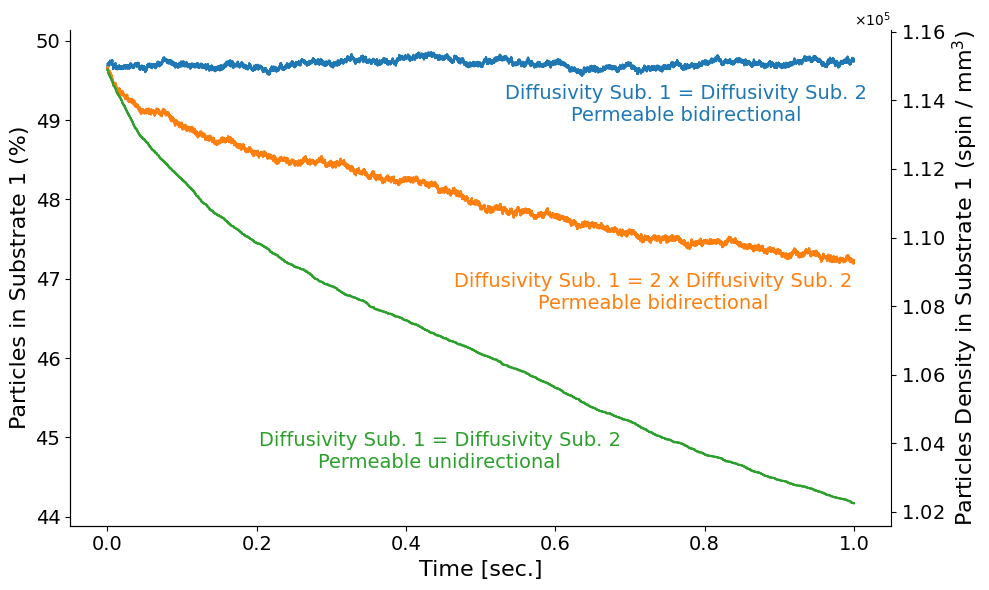

In [14]:
from matplotlib.ticker import ScalarFormatter

nspins  = P.shape[0]
lines = list()
x = np.linspace(0, 1, P.shape[1])
plt.close('all')
fig, ax = plt.subplots(figsize=(10, 6))

for i, p in enumerate(P_count):
    line, = ax.plot(x, 100 * p / nspins, label=filename[i])
    lines.append(line)
    
# ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.patch.set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=14)

ax.text(0.75, 0.85, 'Diffusivity Sub. 1 = Diffusivity Sub. 2\nPermeable bidirectional', transform=ax.transAxes, fontsize=14, ha='center', va='center', color=lines[0].get_color())
ax.text(0.71, 0.47, 'Diffusivity Sub. 1 = 2 x Diffusivity Sub. 2\nPermeable bidirectional', transform=ax.transAxes, fontsize=14, ha='center', va='center', color=lines[1].get_color())
ax.text(0.45, 0.15, 'Diffusivity Sub. 1 = Diffusivity Sub. 2\nPermeable unidirectional', transform=ax.transAxes, fontsize=14, ha='center', va='center', color=lines[2].get_color())
ax.set_xlabel('Time [sec.]', fontsize=16)
ax.set_ylabel('Particles in Substrate 1 (%)', fontsize=16)

ax_t = ax.twinx()
Volume = 0.6 * 0.6 * 0.6
for i, p in enumerate(P_count):
    ax_t.plot(x, p / Volume, label=filename[i])
ax_t.spines['top'].set_visible(False)
ax_t.patch.set_visible(False)
ax_t.tick_params(axis='both', which='major', labelsize=14)
ax_t.set_ylabel('Particles Density in Substrate 1 (spin / $\mathrm{mm^3}$)', fontsize=16)
formatter = ScalarFormatter(useMathText=True)  # Use scientific notation with MathText
formatter.set_scientific(True)
formatter.set_powerlimits((-1, 1))  # Force scientific notation if values exceed 10^1 or 10^-1
ax_t.yaxis.set_major_formatter(formatter)

# plt.legend()
fig.tight_layout()

# plt.savefig("./figures/fig8_diffusion_bias.svg", format='svg', dpi=1200, bbox_inches='tight')
plt.savefig("../figures_pdf/fig8_diffusion_bias.pdf", format='pdf', dpi=1200, bbox_inches='tight')
plt.show()